# Feature engineering

In [4]:
import pandas as pd


df = pd.read_csv(r"C:\Users\ashis\Downloads\data for ironheck\learningSet.csv")
df.info()

drop_list = ['OSOURCE', 'ZIP']

df_cleaned = df.drop(columns=drop_list, errors='ignore')

C:\Users\ashis\AppData\Local\Temp\ipykernel_17124\4220327802.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ashis\Downloads\data for ironheck\learningSet.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [5]:
# 1. Check for Null Values in Numerical Columns

numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

null_values_numerical = numerical_columns.isnull().sum()

print(null_values_numerical[null_values_numerical > 0])


AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
            ...  
RAMNT_23    87553
RAMNT_24    77674
NEXTDATE     9973
TIMELAG      9973
CLUSTER2      132
Length: 91, dtype: int64


In [6]:
# 2. Clean Specific Columns (GEOCODE2, WEALTH1, ADI, DMA, MSA)

# a. GEOCODE2 Column

print(df_cleaned['GEOCODE2'].value_counts(dropna=False))

df_cleaned['GEOCODE2'] = df_cleaned['GEOCODE2'].fillna('Unknown')

print(df_cleaned['GEOCODE2'].value_counts(dropna=False))


A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64
A          34484
B          28505
D          16580
C          15524
             187
Unknown      132
Name: GEOCODE2, dtype: int64


In [7]:
# b. WEALTH1 Column

print(df_cleaned['WEALTH1'].value_counts(dropna=False))

df_cleaned['WEALTH1'] = df_cleaned['WEALTH1'].fillna('Unknown')

print(df_cleaned['WEALTH1'].value_counts(dropna=False))


NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64
Unknown    44732
9.0         7585
8.0         6793
7.0         6198
6.0         5825
5.0         5280
4.0         4810
3.0         4237
2.0         4085
1.0         3454
0.0         2413
Name: WEALTH1, dtype: int64


In [8]:
# c. ADI (Area Development Index), DMA (Designated Market Area), and MSA (Metropolitan Statistical Area)

print(df_cleaned[['ADI', 'DMA', 'MSA']].isnull().sum())

df_cleaned['ADI'] = df_cleaned['ADI'].fillna(df_cleaned['ADI'].median())
df_cleaned['DMA'] = df_cleaned['DMA'].fillna(df_cleaned['DMA'].median())
df_cleaned['MSA'] = df_cleaned['MSA'].fillna(df_cleaned['MSA'].median())

print(df_cleaned[['ADI', 'DMA', 'MSA']].isnull().sum())


ADI    132
DMA    132
MSA    132
dtype: int64
ADI    0
DMA    0
MSA    0
dtype: int64


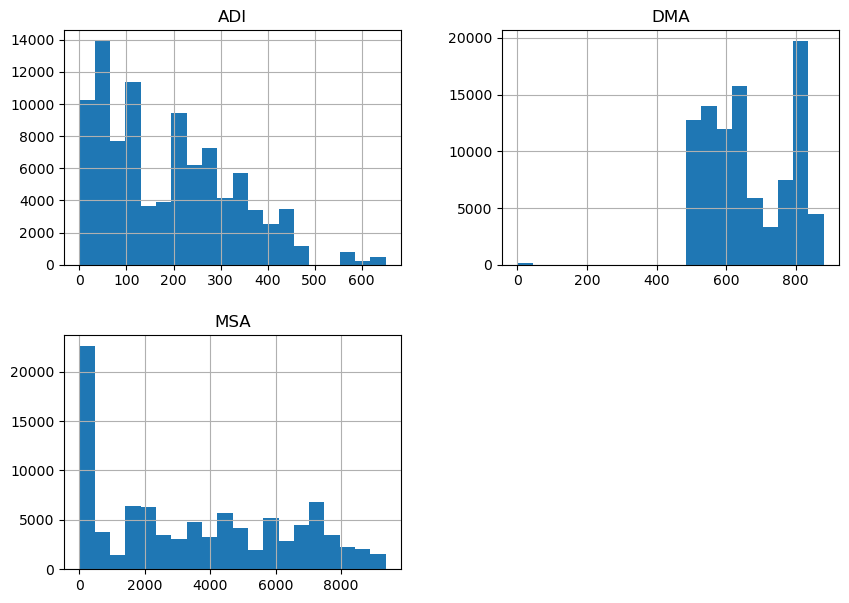

In [9]:
# 3. Exploratory Data Analysis (EDA) Techniques
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for ADI, DMA, and MSA
df_cleaned[['ADI', 'DMA', 'MSA']].hist(bins=20, figsize=(10, 7))
plt.show()


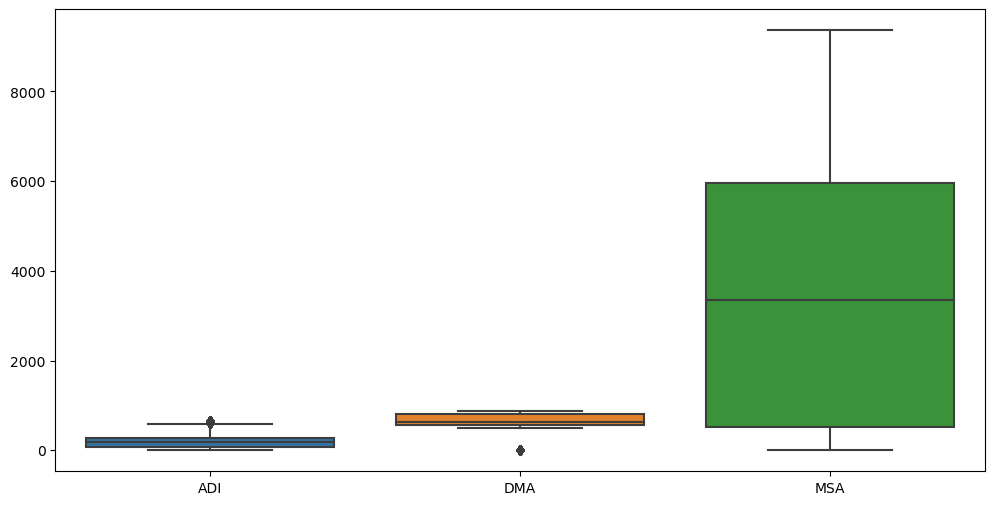

In [10]:
# Box plot for ADI, DMA, MSA to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['ADI', 'DMA', 'MSA']])
plt.show()
